In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# The very first look at the dataset
df = pd.read_csv('dataset.csv')
df.head()

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0,0,0,178,...,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20-02-1982,34,0,0,0,0,188,...,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11-04-1982,34,0,0,0,0,183,...,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07-04-1985,31,0,0,0,0,170,...,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20-01-1983,33,0,0,0,0,181,...,1,1,1,1,1,1,1,1,1,1


In [44]:
# Getting a list of all columns in the dataframe
df.columns

Index(['UID', 'Name', 'NationID', 'Born', 'Age', 'IntCaps', 'IntGoals',
       'U21Caps', 'U21Goals', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch',
       'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional',

In [4]:
# Let's get the dimensions of the dataframe
df.shape

(159541, 89)

In [5]:
# A quick look at the data types each column/feature holds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159541 entries, 0 to 159540
Data columns (total 89 columns):
UID                    159541 non-null int64
Name                   159541 non-null object
NationID               159541 non-null int64
Born                   159541 non-null object
Age                    159541 non-null int64
IntCaps                159541 non-null int64
IntGoals               159541 non-null int64
U21Caps                159541 non-null int64
U21Goals               159541 non-null int64
Height                 159541 non-null int64
Weight                 159541 non-null int64
AerialAbility          159541 non-null int64
CommandOfArea          159541 non-null int64
Communication          159541 non-null int64
Eccentricity           159541 non-null int64
Handling               159541 non-null int64
Kicking                159541 non-null int64
OneOnOnes              159541 non-null int64
Reflexes               159541 non-null int64
RushingOut             159541 no

In [7]:
# Quick statiscial distribution of the age column.
# Rough meaning: 75% of our data includes players <= 27 years old
df['Age'].describe()

count    159541.000000
mean         23.578033
std           5.640172
min          14.000000
25%          19.000000
50%          23.000000
75%          27.000000
max          54.000000
Name: Age, dtype: float64

In [9]:
# Even though the .info method showed us all columns are non-null, let's recheck
df['Age'].isna().unique()
# Output array only holds False values
# This implies we have no null values

array([False])

In [16]:
# List of unique values in the Age column
age_values = df['Age'].unique()
np.sort(age_values)

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 53, 54])

In [4]:
# Split the datframe using groupby method
age = df.groupby(['Age'])
age

In [22]:
# Let's pick two features to analyze in detail
# Here we are 'applying' a function to the grouby object 'age'
age[['IntCaps', 'IntGoals']].describe()

IntCaps                                                      IntGoals  \
       count       mean        std   min   25%   50%   75%    max    count   
Age                                                                          
14      70.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0     70.0   
15    2076.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0   2076.0   
16   12988.0   0.000462   0.039240   0.0   0.0   0.0   0.0    4.0  12988.0   
17    8965.0   0.008366   0.236263   0.0   0.0   0.0   0.0   13.0   8965.0   
18   10629.0   0.014583   0.419996   0.0   0.0   0.0   0.0   29.0  10629.0   
19   11272.0   0.032115   0.489113   0.0   0.0   0.0   0.0   20.0  11272.0   
20   10935.0   0.066301   0.831899   0.0   0.0   0.0   0.0   31.0  10935.0   
21   10527.0   0.125107   1.255436   0.0   0.0   0.0   0.0   34.0  10527.0   
22    9769.0   0.241376   1.923625   0.0   0.0   0.0   0.0   40.0   9769.0   
23    9575.0   0.430183   2.888519   0.0   0.0   0.0   0.0   58.0   9575.0   
24    8730.0   0.613631   3.740643   0.0   0.0   0.0   0.0   70.0   8730.0   
25    8426.0   0.772015   4.235319   0.0   0.0   0.0   0.0   70.0   8426.0   
26    8191.0   1.090221   5.587688   0.0   0.0   0.0   0.0   95.0   8191.0   
27    7541.0   1.326349   6.419093   0.0   0.0   0.0   0.0   94.0   7541.0   
28    6743.0   1.694795   7.829046   0.0   0.0   0.0   0.0  121.0   6743.0   
29    6220.0   2.177331   9.382283   0.0   0.0   0.0   0.0  130.0   6220.0   
30    5581.0   2.518187  10.501249   0.0   0.0   0.0   0.0  136.0   5581.0   
31    4871.0   3.009033  11.856548   0.0   0.0   0.0   0.0  161.0   4871.0   
32    4065.0   3.326691  12.789484   0.0   0.0   0.0   0.0  133.0   4065.0   
33    3507.0   3.565441  13.197302   0.0   0.0   0.0   0.0  148.0   3507.0   
34    2812.0   4.332859  15.501052   0.0   0.0   0.0   0.0  153.0   2812.0   
35    2023.0   4.396441  16.282953   0.0   0.0   0.0   0.0  166.0   2023.0   
36    1371.0   4.783370  16.683456   0.0   0.0   0.0   0.0  138.0   1371.0   
37     928.0   4.183190  16.313503   0.0   0.0   0.0   0.0  146.0    928.0   
38     637.0   3.563579  15.252316   0.0   0.0   0.0   0.0  161.0    637.0   
39     372.0   4.360215  17.866209   0.0   0.0   0.0   0.0  135.0    372.0   
40     267.0   4.089888  15.173166   0.0   0.0   0.0   0.0  134.0    267.0   
41     178.0   4.000000  15.495944   0.0   0.0   0.0   0.0  121.0    178.0   
42      92.0   3.760870  11.826929   0.0   0.0   0.0   0.0   67.0     92.0   
43      62.0   4.112903  19.686148   0.0   0.0   0.0   0.0  143.0     62.0   
44      43.0   2.418605   6.264916   0.0   0.0   0.0   0.0   24.0     43.0   
45      24.0   6.583333  16.170065   0.0   0.0   0.0   0.0   60.0     24.0   
46      14.0   0.071429   0.267261   0.0   0.0   0.0   0.0    1.0     14.0   
47       7.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0      7.0   
48      14.0   1.214286   4.543441   0.0   0.0   0.0   0.0   17.0     14.0   
49       4.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0      4.0   
50       5.0   8.800000  17.020576   0.0   0.0   0.0   5.0   39.0      5.0   
51       2.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0      2.0   
53       1.0  25.000000        NaN  25.0  25.0  25.0  25.0   25.0      1.0   
54       4.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0      4.0   

                                                   
         mean       std  min  25%  50%  75%   max  
Age                                                
14   0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
15   0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
16   0.000077  0.008775  0.0  0.0  0.0  0.0   1.0  
17   0.000781  0.046032  0.0  0.0  0.0  0.0   4.0  
18   0.002917  0.126067  0.0  0.0  0.0  0.0  11.0  
19   0.003282  0.098286  0.0  0.0  0.0  0.0   6.0  
20   0.004938  0.124593  0.0  0.0  0.0  0.0  10.0  
21   0.013394  0.289652  0.0  0.0  0.0  0.0  22.0  
22   0.023339  0.283428  0.0  0.0  0.0  0.0  11.0  
23   0.048668  0.528815  0

In [27]:
# Let's extract the max value of international caps and goals for each age group.
age[['IntCaps', 'IntGoals']].max()

,IntCaps,IntGoals
Age,,
14,0,0
15,0,0
16,4,1
17,13,4
18,29,11
19,20,6
20,31,10
21,34,22
22,40,11


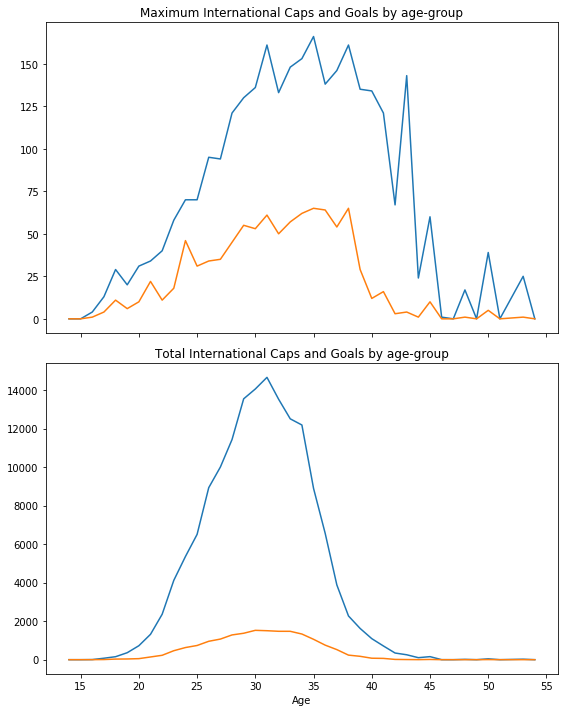

In [5]:
# Let's make our first data visualization! 
f, axarr = plt.subplots(2, sharex=True, figsize=(8,10))

international_max = age[['IntCaps', 'IntGoals']].max()
axarr[0].plot(international_max)
axarr[0].set_title('Maximum International Caps and Goals by age-group')

international_sum = age[['IntCaps', 'IntGoals']].sum()
axarr[1].plot(international_sum)
axarr[1].set_title('Total International Caps and Goals by age-group')
axarr[1].set_xlabel("Age")
plt.tight_layout()

In [124]:
goals_max = international_max['IntGoals']
goals_max

Age
14     0
15     0
16     1
17     4
18    11
19     6
20    10
21    22
22    11
23    18
24    46
25    31
26    34
27    35
28    45
29    55
30    53
31    61
32    50
33    57
34    62
35    65
36    64
37    54
38    65
39    29
40    12
41    16
42     3
43     4
44     1
45    10
46     0
47     0
48     1
49     0
50     5
51     0
53     1
54     0
Name: IntGoals, dtype: int64

In [134]:
x = []
for value, dataframe in age:
    if goals_max[value] > 0:
        print(value, dataframe[dataframe.IntGoals == goals_max[value]]['Name'].values)

16 ['Vincent Thill']
17 ['Joe Aisa']
18 ['Faruku Miya']
19 ['Gélson']
20 ['Oalex Anderson']
21 ['Sardar Azmoun']
22 ['Arkadiusz Milik']
23 ['Emmanuel Okwi']
24 ['Neymar']
25 ['Yousef Nasser']
26 ['Jozy Altidore']
27 ['Robert Lewandowski']
28 ['Javier Hernández']
29 ['Lionel Messi']
30 ['Wayne Rooney']
31 ['Cristiano Ronaldo']
32 ['Robin van Persie']
33 ['Younis Mahmoud']
34 ['Zlatan Ibrahimovic']
35 ['Robbie Keane']
36 ['Carlos Ruiz']
37 ['Mohamed Kader']
38 ['Didier Drogba']
39 ['Henri Camara']
40 ['Scott Chipperfield']
41 ['Mario Frick']
42 ['Rudy Khairon' 'Gerald Quennet']
43 ['Lokoua Taufahema']
44 ['Wei Qun' 'Selan Elizah']
45 ['Chris Jackson']
48 ['Sylvain Booene']
50 ['Henrik Larsen']
53 ['Iosif Rotariu']


In [26]:
# Remove the head() method to view the entire dataframe
age.mean().head()

,UID,NationID,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
Age,,,,,,,,,,,,,,,,,,,,,
14,1.394666e+09,633.900000,0.000000,0.000000,0.000000,0.000000,177.642857,0.000000,2.828571,2.885714,...,3.914286,5.800000,4.871429,4.814286,2.057143,2.842857,2.785714,3.928571,2.285714,2.314286
15,1.062158e+09,882.291426,0.000000,0.000000,0.000000,0.000000,178.063584,2.618015,2.958574,2.770231,...,3.633430,5.369461,3.842004,3.676301,1.991811,3.620424,3.651734,3.367534,1.943160,1.863198
16,8.639238e+08,5085.177318,0.000462,0.000077,0.002387,0.000077,177.766785,6.199184,2.908839,2.755390,...,3.603480,5.153064,3.762781,3.691330,2.250539,4.057361,3.456113,3.230520,1.929473,1.901601
17,2.125272e+08,30294.569994,0.008366,0.000781,0.025878,0.004462,179.004685,21.584384,2.903067,2.777803,...,3.617178,4.863804,3.066592,3.180257,3.003012,5.459677,2.878528,2.958728,1.805131,1.772225
18,7.019779e+07,82508.436165,0.014583,0.002917,0.039138,0.004140,179.503528,33.977232,2.932731,2.785869,...,3.810236,4.698278,3.028695,3.152131,3.381974,5.736382,2.947502,3.124941,1.935177,1.892088


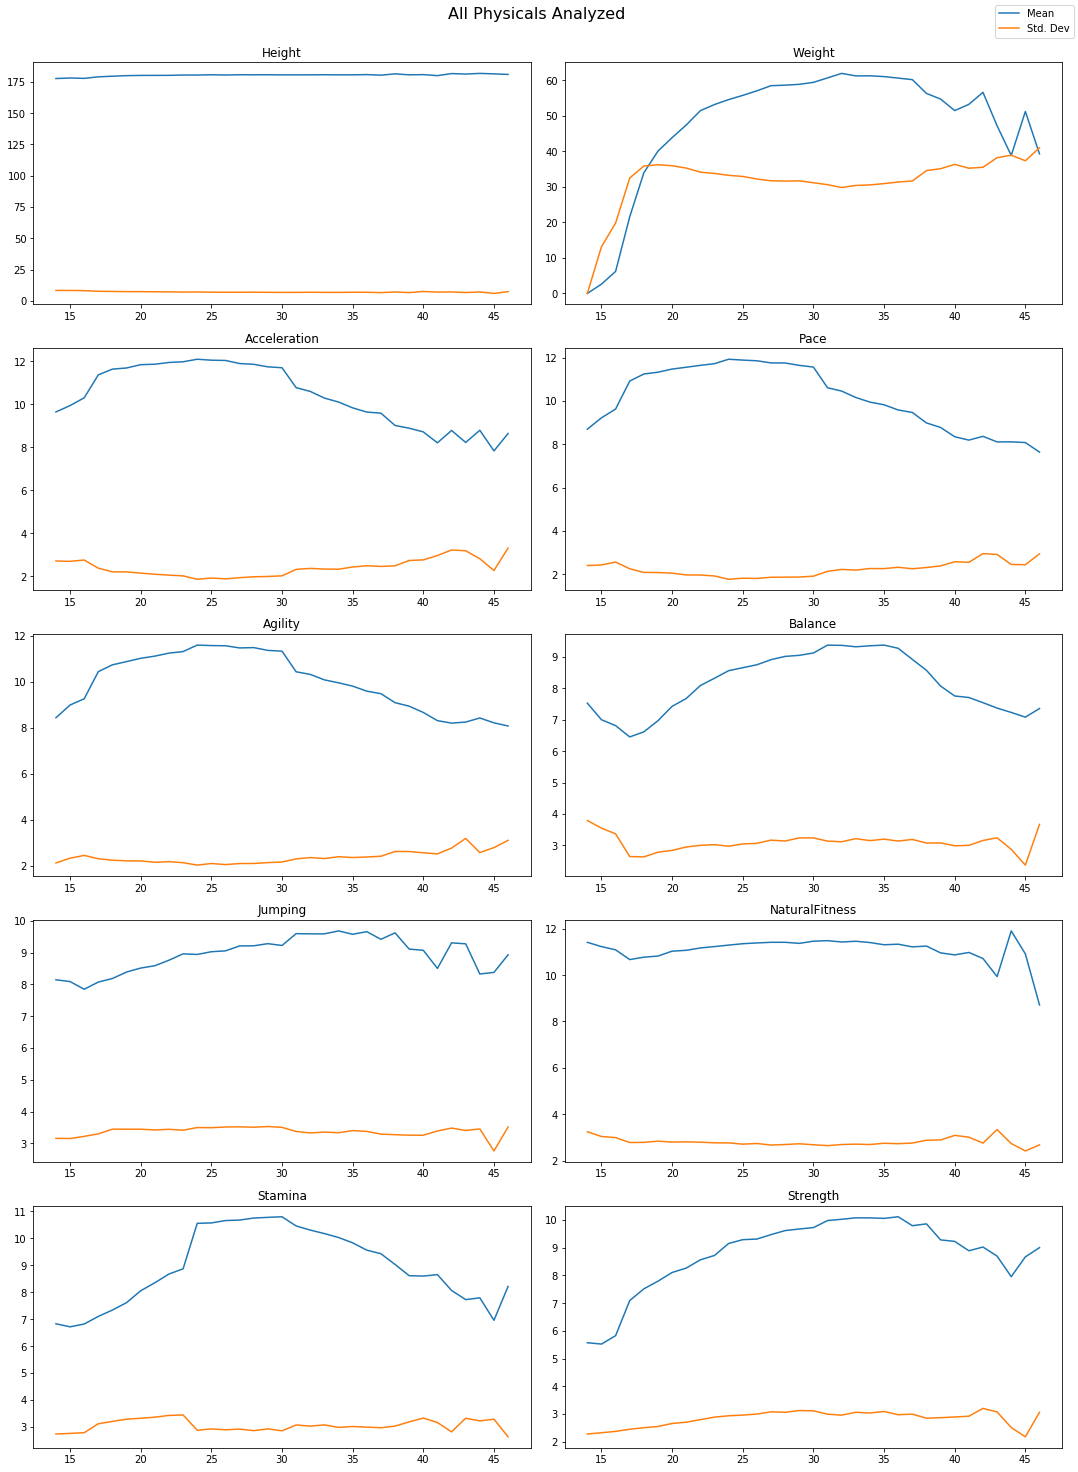

In [6]:
# Extracting just the physicals attributes
physicals = age[['Height', 'Weight', 'Acceleration', 'Pace', 'Agility', 
                 'Balance', 'Jumping', 'NaturalFitness', 'Stamina', 'Strength']]
# The count for players aged 47+ is too low to feel secure about the mean so let's ignore those ages
physicals_subset = physicals.agg(['mean', 'std']).loc[14:46]

#Setting up the subplot
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(15, 20))

ax1.plot(physicals_subset['Height'])
ax1.set_title('Height')

ax2.plot(physicals_subset['Weight'])
ax2.set_title('Weight')

ax3.plot(physicals_subset['Acceleration'])
ax3.set_title('Acceleration')

ax4.plot(physicals_subset['Pace'])
ax4.set_title('Pace')

ax5.plot(physicals_subset['Agility'])
ax5.set_title('Agility')

ax6.plot(physicals_subset['Balance'])
ax6.set_title('Balance')

ax7.plot(physicals_subset['Jumping'])
ax7.set_title('Jumping')

ax8.plot(physicals_subset['NaturalFitness'])
ax8.set_title('NaturalFitness')

ax9.plot(physicals_subset['Stamina'])
ax9.set_title('Stamina')

l1, l2 = ax10.plot(physicals_subset['Strength'])
ax10.set_title('Strength')

# Adding legend and title for the subplot
f.legend((l1, l2), ('Mean', 'Std. Dev'), 'upper right')
f.suptitle('All Physicals Analyzed', fontsize=16, y=1.02)

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Acceleration')

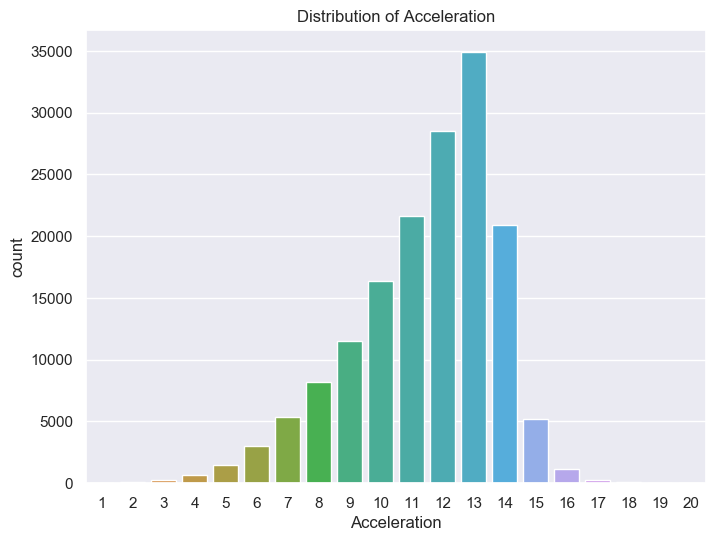

In [18]:
# Distribution of Acceleration throughout the dataset
plt.figure(figsize=(8, 6), dpi=100)
ax = sns.countplot(x="Acceleration",data=df)
ax.set_title("Distribution of Acceleration")

/Users/sarthak/Documents/100-Days-of-ML/Visualizing-Datasets/Football-Manager/fm/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


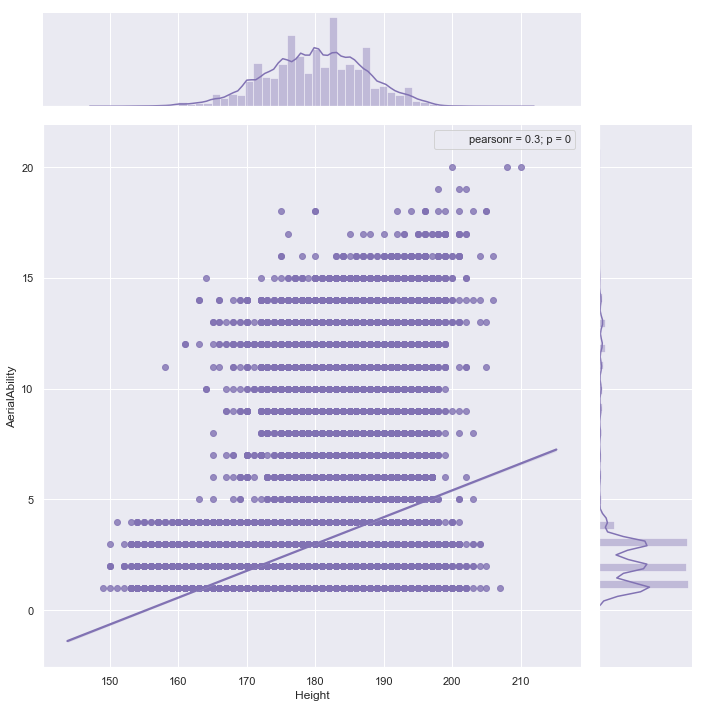

In [7]:
# Jointplot showing the correlation between Height and Aerial Ability

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot("Height", "AerialAbility", data=df, kind="reg", color="m", height=10)
j.annotate(stats.pearsonr)

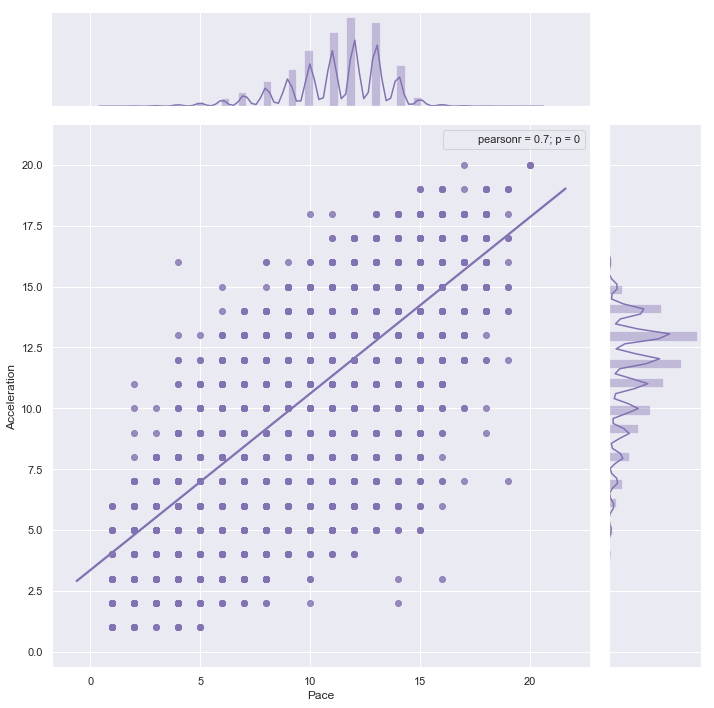

In [8]:
# Jointplot showing the correlation between Pave and Acceleration

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot("Pace", "Acceleration", data=df, kind="reg", color="m", height=10)
j.annotate(stats.pearsonr)

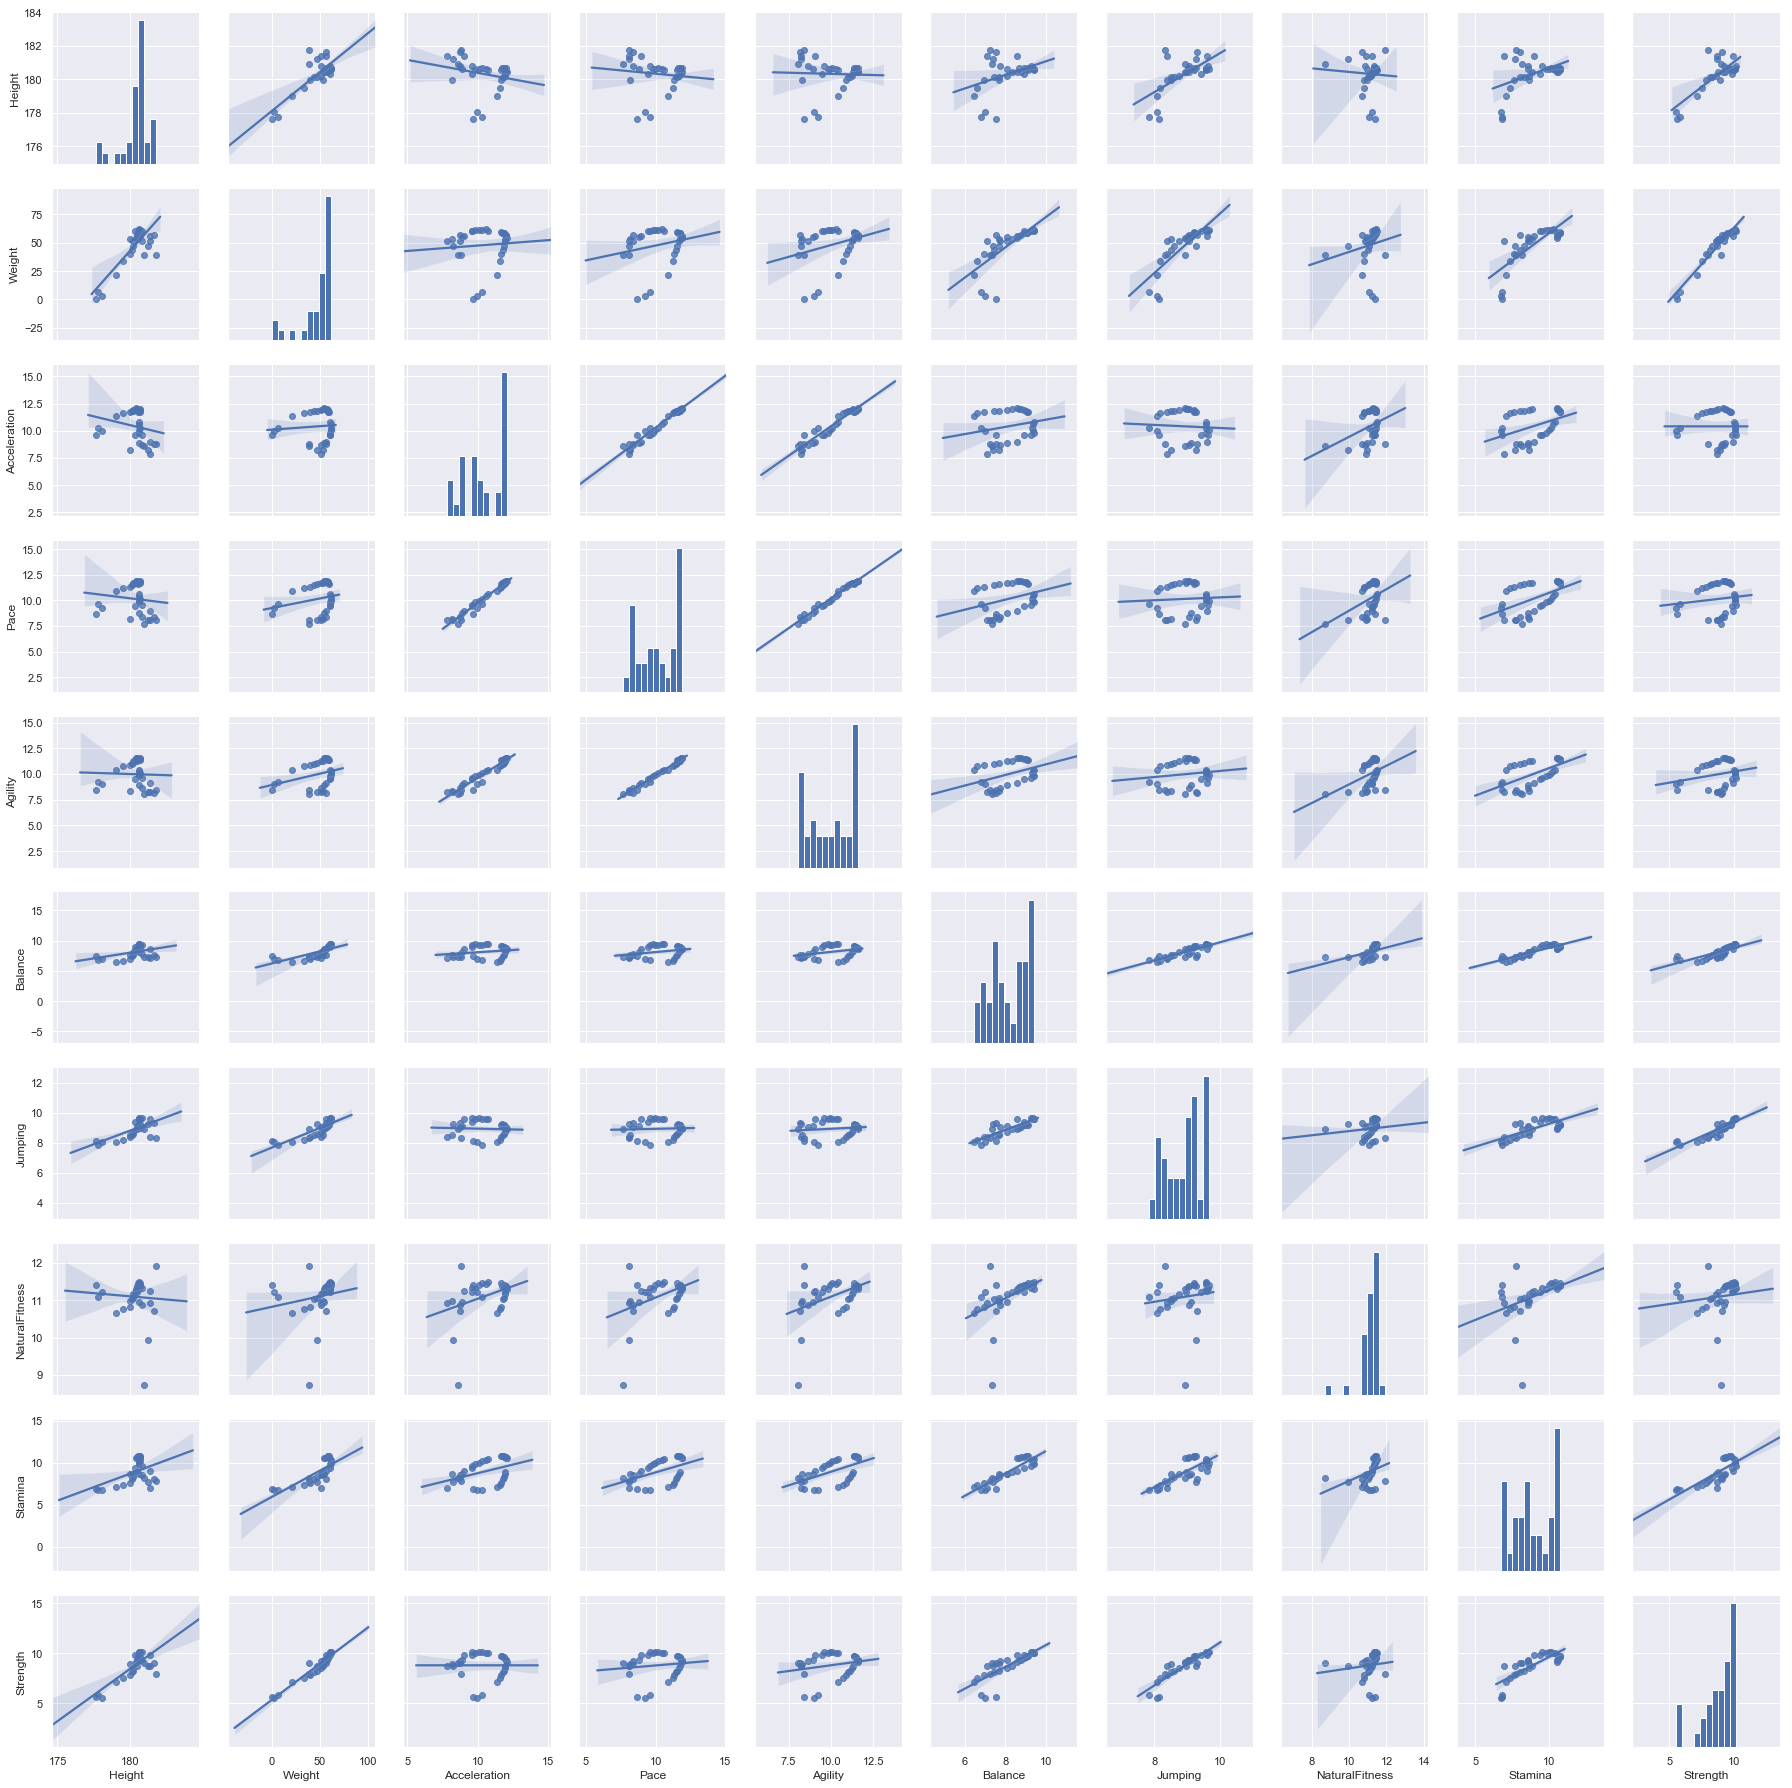

In [9]:
# Plotting a pairplot of all physical attributes to get a quick overview of dependence
pair_df = physicals.mean().loc[14:46]
sns.pairplot(pair_df, kind="reg")

In [50]:
# Function to add pearsonr to each x-y plot
def corrfunc(x, y, **kws):
    (r, p) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, 1.2), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.6, 1.2), xycoords=ax.transAxes)

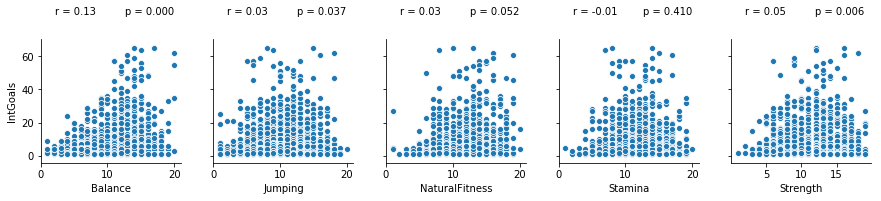

In [61]:
# Testing correlation between International goals and physical attributes
# Balance stands out!
j = sns.pairplot(data=df.query('IntGoals > 0'),
                  y_vars=['IntGoals'],
                  x_vars=['Balance', 'Jumping', 'NaturalFitness', 'Stamina', 'Strength'])
j.map(corrfunc)

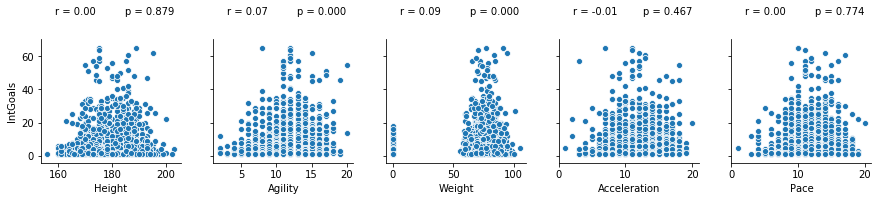

In [62]:
# Testing the remaining physical attributes
# Notice the weight plot has several players with zero weight
g = sns.pairplot(data=df.query('IntGoals > 0'),
                  y_vars=['IntGoals'],
                  x_vars=['Height', 'Agility', 'Weight', 'Acceleration', 'Pace'])

g.map(corrfunc)

In [64]:
# Let's query the dataframe to find players who have scored international goals but have null weight
test = df.query('IntGoals > 0')
test[test['Weight']==0]

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
339,1018326,Ebrahim Sadeghi,114,04-02-1979,37,15,1,0,0,178,...,1,1,1,1,1,20,1,1,1,1
347,1018848,Hossain Badamaki,114,13-09-1981,34,7,2,0,0,182,...,1,1,1,1,1,20,1,1,1,1
385,1020337,Ibrahim Al-Obaidli,107,06-03-1986,30,8,2,0,0,188,...,1,20,1,1,1,1,1,1,1,1
393,1020464,Abdulrahman Mubarak,107,13-05-1985,31,4,1,0,0,167,...,1,1,1,1,1,1,1,1,1,1
423,1021667,Salih Sadir,115,21-08-1981,34,61,7,0,0,175,...,1,1,1,1,1,12,1,1,1,1
499,1026137,Jalal Rafkhaei,114,24-04-1984,32,12,2,0,0,175,...,1,5,1,1,1,1,1,1,1,1
677,1036461,Rashad Jamal,107,18-01-1979,37,28,2,0,0,180,...,1,1,1,1,1,1,1,1,1,1
680,1036525,Ahmed Hasan,107,29-03-1980,36,44,4,0,0,176,...,20,1,1,1,1,1,1,1,1,1
771,1041551,Mojtaba Jabari,114,16-06-1983,33,31,3,6,2,182,...,8,1,1,1,1,1,1,1,1,1
772,1041641,Abolghasem Dehnavi,114,21-03-1981,35,6,3,0,0,182,...,1,1,1,1,20,13,1,1,1,1


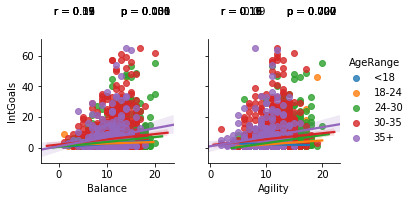

In [75]:
# Map players to age group!
age_values = df['Age'].unique()
age_values = np.sort(age_values)
test = df
bins = [14, 18, 24, 30, 35, np.inf]
names = ['<18', '18-24', '24-30', '30-35', '35+']

test['AgeRange'] = pd.cut(test['Age'], bins, labels=names)

g = sns.pairplot(data=test.query('IntGoals > 0'),
                  y_vars=['IntGoals'],
                  x_vars=['Balance', 'Agility'], hue="AgeRange")

g.map(corrfunc)

Text(0, 0.5, 'Count')

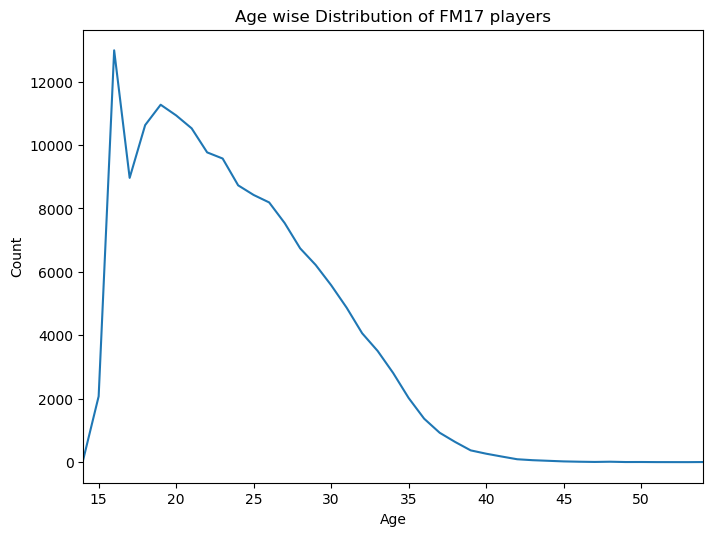

In [7]:
plt.figure(figsize=(8, 6), dpi=100)
ax = age['Leadership'].count().plot()
ax.set_title('Age wise Distribution of FM17 players')
ax.set_xlabel("Age")
ax.set_ylabel("Count")

Text(0, 0.5, 'Leadership')

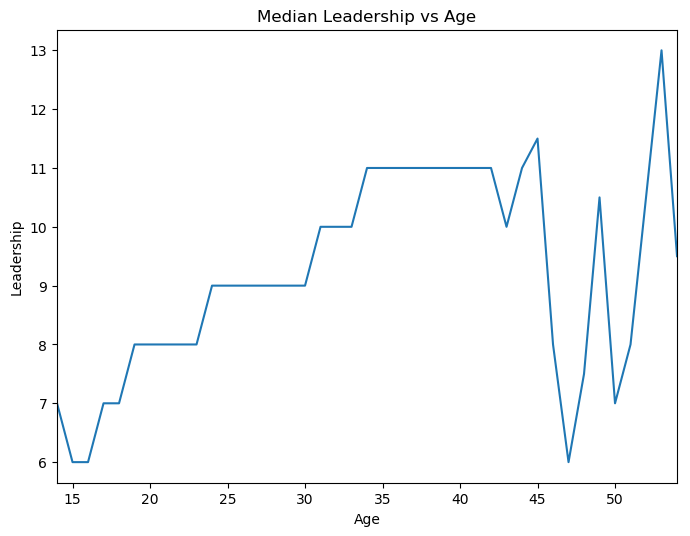

In [8]:
plt.figure(figsize=(8, 6), dpi=100)
ax = age['Leadership'].median().plot()
ax.set_title('Median Leadership vs Age')
ax.set_xlabel("Age")
ax.set_ylabel("Leadership")

Text(0, 0.5, 'International Goals')

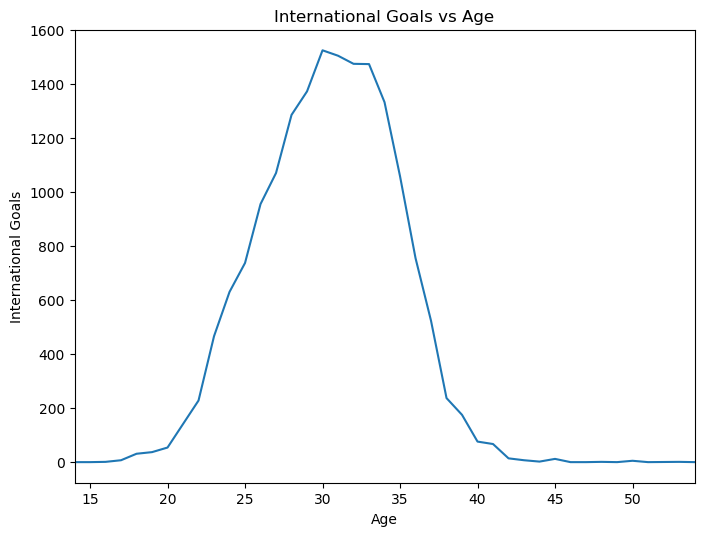

In [10]:
plt.figure(figsize=(8, 6), dpi=100)
ax = age['IntGoals'].sum().plot()
ax.set_title('International Goals vs Age')
ax.set_xlabel("Age")
ax.set_ylabel("International Goals")

In [12]:
df[df['Acceleration'] == 20][['Name', 'Weight']]

,Name,Weight
52177,Héctor Bellerín,72
52452,Ola Aina,81
74688,Pierre-Emerick Aubameyang,80
99074,David Radebe,0


In [13]:
df[df['Name'] == 'David Radebe'][['Name', 'Flair', 'Pace', 'Acceleration']]

,Name,Flair,Pace,Acceleration
99074,David Radebe,12,20,20


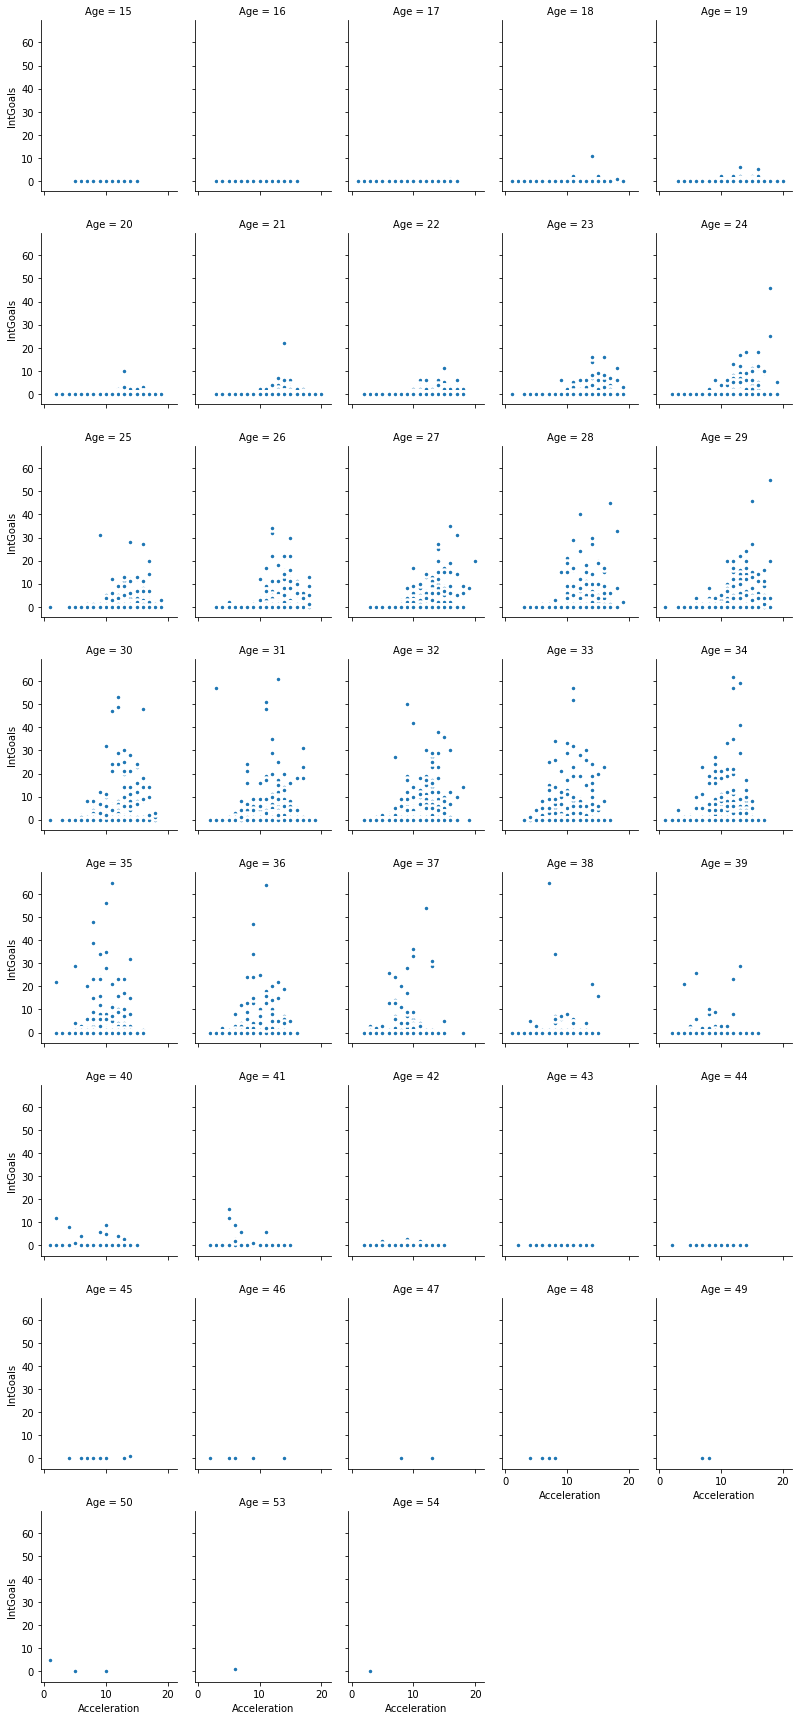

In [14]:
sns.relplot(x="Acceleration", y="IntGoals", col="Age", col_wrap=5, height=3, 
                aspect=.75, linewidth=2.5, kind="scatter", data=df.query("Weight > 0"))

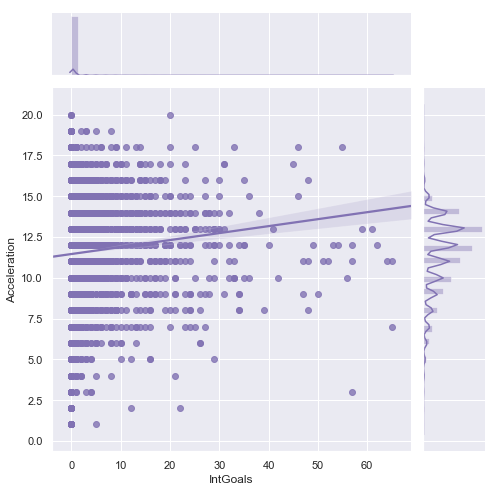

In [15]:
sns.set(style="darkgrid")
sns.jointplot("IntGoals", "Acceleration", data=df, kind="reg", color="m", height=7)

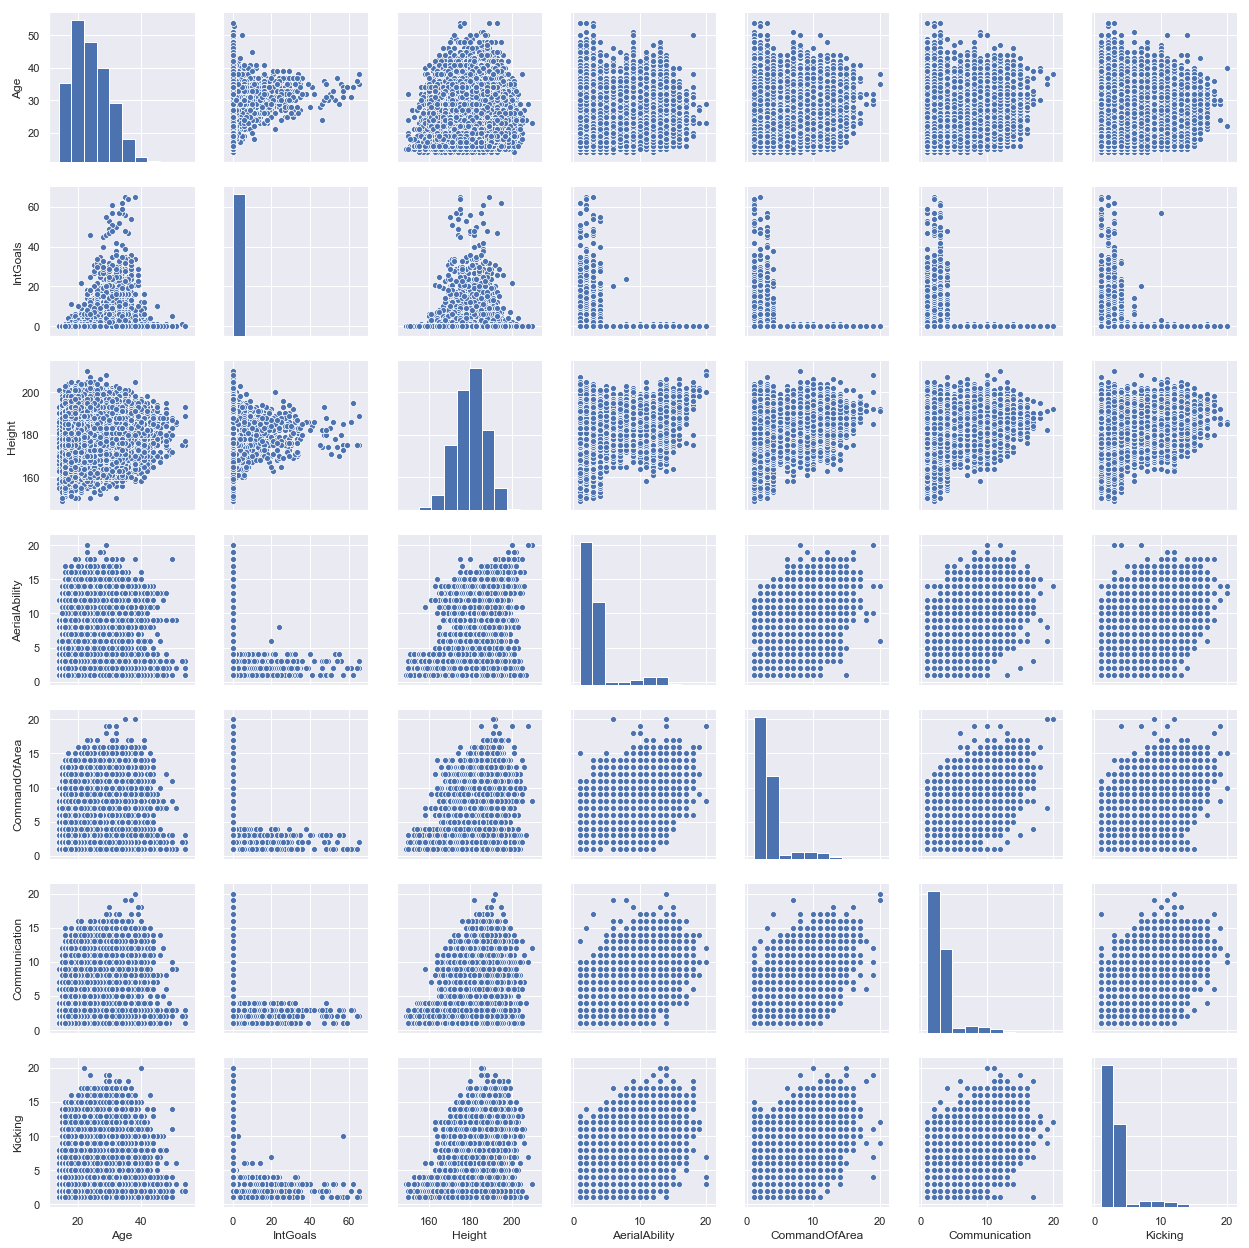

In [21]:
reduced = df[['Age', 'IntGoals', 'Height', 'AerialAbility', 'CommandOfArea', 'Communication', 'Kicking']]
sns.pairplot(reduced)